> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 4.2 - APIs


## Exercícios 🔭🌌🪐

Vamos acessar as APIs da NASA para ver algumas imagens interessantes capturadas universo afora!

#### Q1.
Crie uma chave no site oficial:
* https://api.nasa.gov

Vamos armazenar a chave de forma segura! <br>
Salve a sua chave em um arquivo `key.json` na forma:
`API_KEY=SUA_CHAVE`

Adicione o nome do arquivo `key.json` ao `.gitignore` do repositório que você fará upload da atividade.
Para isso basta abrir o arquivo `.gitignore` na pasta raíz do repositório (ou criar um caso ele não exista). Dentro do arquivo, apenas adiciona o nome do arquivo que deseja ignorar.

In [66]:
### adicionando a chave
import json 

with open("key.json") as file:
    data = json.load(file)
    
minha_key = data['API_KEY']
print(minha_key)

LGxqXuWugQttF1DebrJ8GBv4b3zXOjozGhIc0lKV


#### Q2. 🛰 Astronomy Picture of the Day (APOD) 🌌
> Antes de fazer os exercícios, devo te lembrar que existem limites de acesso às APIs, descritas na página principal, portanto pega leve na tentativa e erro na hora de testar seu código.

<img width=500 src=https://apod.nasa.gov/apod/image/2407/M24-HaLRGB-RC51_1024.jpg>

A primeira API que acessaremos é a mais popular de todas: astronomy picture of the day (foto astronômica do dia).

Faça uma requisição GET para a URL da API que retorna a imagem do dia! Essa é fácil já que são os valores padrão da rota principal:
* URL base: `'https://api.nasa.gov/planetary/apod'`
* Endpoint: não precisa preencher, acessaremos a raíz da API.
* Query params: preencha `api_key` com a sua chave de autenticação. Se animar mexer em outros parâmetros veja [a documentação](https://api.nasa.gov).

Ao receber a resposta (um json), você deve:
* Imprimir os campos `copyright` e `explanation`
* Com as biblioteca scikit-images e matplotlib, apresente a imagem a partir do campo `url` ou `hdurl`, e preencha o título do plot com o campo `title` do json. Uma dica de código a seguir.
```python
from skimage import io
img = io.imread(url)
## plot a matriz img com matplotlib (imshow)
```   

On January 13 a Full Moon and a Full Mars were close, both bright and opposite the Sun in planet Earth's sky. In fact Mars was occulted, passing behind the Moon, when viewed from some locations in North America and northwest Africa.  As seen from Richmond, Virginia, USA, this composite image sequence follows the evening lunar occultation before, during, and after the much anticipated celestial spectacle. The telescopic time series is constructed from an exposure made every two minutes while tracking the Moon over the hours encompassing the event. As a result, the Red Planet's trajectory seems to follow a gently curved path due to the Moon's slightly different rate of apparent motion. The next lunar occultation of bright planet Mars will be on February 9 when the moon is in a waxing gibbous phase. Lunar occultations are only ever visible from a fraction of the Earth's surface, though. The February 9 occultation of Mars will be seen from parts of Russia, China, eastern Canada, Greenland 

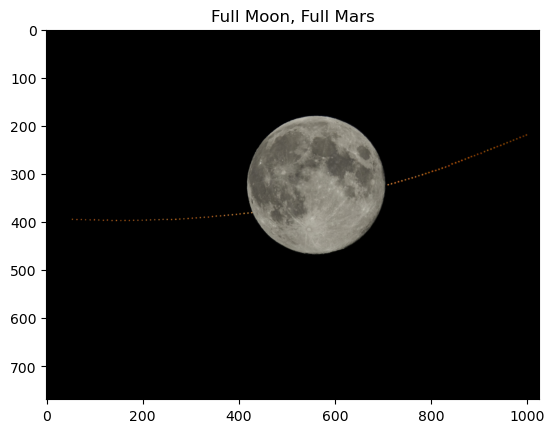

On January 13


In [51]:
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from io import BytesIO

#entra em contato com a API
response = requests.get(f'https://api.nasa.gov/planetary/apod?api_key={minha_key}') 
#transforma seus dados em json
response = response.json()

#buscando campos de seu dicionario retornado
copyright = response['copyright']
explanation = response['explanation']
title = response['title']
img_URL = response['url']
img_URL = requests.get(img_URL) #trata o request para baixar a imagem e o matplot suportar a URL 


#criando a imagem
img = Image.open(BytesIO(img_URL.content))
plt.imshow(img)
plt.title(title)

#Prints
print(explanation)
plt.show()
print(copyright)

#### Q3. Limites
A partir da resposta da query anterios, imprima o header da resposta e consulte os atributos:
* X-RateLimit-Limit: o limite total de requisições da sua chave de API
* X-RateLimit-Remaining: o limite restante de requisições da sua chave de API

In [56]:
response = requests.get(f'https://api.nasa.gov/planetary/apod?api_key={minha_key}') 

print(f'Meu limite: {response.headers.get("X-RateLimit-Limit")}')
print(f'Limite restante: {response.headers.get("X-RateLimit-Remaining")}')

Meu limite: 2000
Limite restante: 1965


### Q4. Mars Rover Photos 🚀🚙 📷

<img width=500 src=https://www.nasa.gov/wp-content/uploads/2019/10/pia23378-16.jpg>

Essa API retorna dados (incluindo imagens capturadas) sobre os veículos que hoje habitam o planeta Marte. São os rovers `opportunity`, `spirit` e o mais famoso, o `curiosity` (da foto acima).

Antes de requisitar imagens, vamos ver o relatório de dados coletados por um deles, o `curiosity`. Isso vai nos ajudar a montar a query de imagens coletadas.

Faça uma requisição GET para a seguinte URL:
* URL base: `'https://api.nasa.gov/mars-photos/api/v1'`
* endpoint: `'/manifests/{nome_do_rover}'`
* query parameters: preencha `api_key` com a sua chave de autenticação.

Extraia o json da resposta retornada. O campo principal é o `'photo_manifest'`, do qual queremos acessar os seguintes valores:
* `max_sol`: Máximo "dia marciano" de coleta de fotos. O dia marciano tem 24 horas, 39 minutos e 35 segundos.
* `max_date`: Última data terrestre de coleta de fotos, na forma `'aaaa-mm-dd'`.

Imprima esses dois atributos da resposta e os use no próximo exercício para coletar as fotos mais recentes tiradas. 

In [126]:
### adicionando a chave
import json 

with open("key.json") as file:
    data = json.load(file)
    
minha_key = data['API_KEY']

#variaveis da API
minha_key = data['API_KEY']
nome_do_rover = "Curiosity"
base_url = "https://api.nasa.gov/mars-photos/api/v1"
endpoint = f'/manifests/{nome_do_rover}'
url = base_url + endpoint

#entrando em contato
response = requests.get(url, params={"api_key": minha_key})
data = response.json()

#buscando as keys
max_sol = data['photo_manifest']['max_sol']
max_date = data['photo_manifest']['max_date']

#prints
print("Ultimo dia marciano das coletas: " + str(max_sol))
print("Ultima data terrestre das coletas: " + str(max_date))

Ultimo dia marciano das coletas: 5111
Ultima data terrestre das coletas: 2018-06-11


#### Q5.

Faça uma requisição GET para a URL da API que retorna links para as imagens coletadas pelos rovers.

* URL base: `'https://api.nasa.gov/mars-photos/api/v1'`
* Endpoint: `/rovers/{nome_do_rover}/photos`
* Query params sugeridos: 
    * `api_key`: sua chave de autenticação.
    * `sol`: dia marciano que deseja coletar (de 0 a `max_sol` coletado anteriormente)
    * `page`: você pode paginar entre as respostas! São retornados 25 resultados por página.

A resposta esperada estará no formato a seguir, uma lista no campo `'photos'` onde cada item é um dicionário com os dados da foto tirada. Dentre os dados há o campo `camera` indicando qual das câmeras do rover tirou a foto. As fotos mais interessantes (na minha opinião, claro) são das câmeras de navegação (`"name": "NAVCAM"`) e as de prevenção de colisão (frente: `"name": "FHAZ"` e trás `"name": "RHAZ"`) onde dá pra ver partes do robô!

**Seu trabalho é**:
* Paginar a requisição acima até que a resposta seja `None`
* Escolher uma ou mais câmeras (ex: `NAVCAM`, `FHAZ`, `RHAZ`), e em um laço de repetição plotar todas as imagens retornadas daquela câmera. Use novamente as bibliotecas scikit-image e matplotlib. 
  * O título da imagem deve ter a página da requisição, nome da câmera e id da imagem.

```json
{
  "photos": [
    {
      "id": 1228212,
      "sol": 4102,
      "camera": {
        "id": 20,
        "name": "FHAZ",
        "rover_id": 5,
        "full_name": "Front Hazard Avoidance Camera"
      },
      "img_src": "https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/04102/opgs/edr/fcam/FLB_761645828EDR_F1060660FHAZ00302M_.JPG",
      "earth_date": "2024-02-19",
      "rover": {
        "id": 5,
        "name": "Curiosity",
        ...
      }
    }
    {
      "id": 1228213,
      "sol": 4102, 
      ...
    }
```



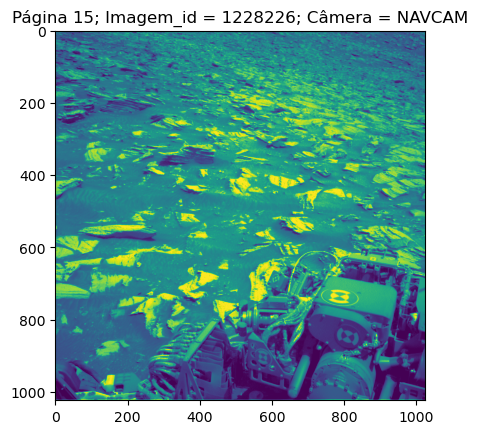

In [131]:
### adicionando a chave
import json 
from IPython.display import clear_output

with open("key.json") as file:
    data = json.load(file)
    
minha_key = data['API_KEY']

#variaveis da API
minha_key = data['API_KEY']
nome_do_rover = "Curiosity"
base_url = "https://api.nasa.gov/mars-photos/api/v1"
endpoint = f'/rovers/{nome_do_rover}/photos'
url = base_url + endpoint
cameras = ['NAVCAM', 'FHAZ', 'RHAZ']

i = 0 #index da imagem
r = 0 #numero de repetições

while r < 15:
    if fotos[i]['camera']['name'] not in cameras:
        i += 1 #busca a proxima imagem 
        continue #pula toda vez que não tem a camera desejada
        
    response = requests.get(url, params={"api_key": minha_key, "sol":4102})
    data = response.json()
    fotos = data['photos']

    #buscando itens
    pagina = r+1
    camera = fotos[i]['camera']['name']
    imgId = fotos[i]['id']
    img_URL = fotos[i]['img_src']
    
    title = f'Página {pagina}; Imagem_id = {imgId}; Câmera = {camera}'
    img_URL = requests.get(img_URL) #trata o request para baixar a imagem e o matplot suportar a URL 
       
    #criando imagem
    img = Image.open(BytesIO(img_URL.content))
    plt.imshow(img)
    plt.title(title)
    plt.show()
    
    i += 1
    r += 1 #passa para a proxima página
    clear_output(wait=True) #limpa o terminal a cada imagem nova 